#MeriSKILL Project3:HR Analytics Project

#Tasks to perform:

#Data Cleaning:

Deleting redundant columns.

Renaming the columns.

Dropping duplicates.

Cleaning individual columns.

Remove the NaN values from the dataset

Check for some more Transformations

#Data Visualization:

Plot a correlation map for all numeric variables

Overtime

Marital Status

Job Role

Gender

Education Field

Department

Business Travel

Relation between Overtime and Age

Total Working Years

Education Level

Number of Companies Worked

Distance from Home


#Importing All Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Importing HR Analytics dataset:

In [2]:
HRAnalytics = pd.read_csv('HREmployeeAttrition.csv')

In [3]:
HRAnalytics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#Find out shape of the dataset

In [4]:
HRAnalytics.shape

(1470, 35)

#Finding to see the how many columns present in the dataset.

In [5]:
HRAnalytics.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#Checking Non-Null Count and Datatype of each column present in the Diabetes dataset:

In [6]:
HRAnalytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#Checking null values present in the diabetes dataset columnwise:

In [7]:
HRAnalytics.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#Checking number of unique values columnwise:

In [8]:
HRAnalytics.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#Describe the dataset:

In [9]:
HRAnalytics.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#Finding duplicate rows in Table:

In [10]:
HRAnalytics.duplicated().sum()

0

#Finding Zeros in Table:

In [11]:
# Sum of counts of zeros for each column
zeros_sum = (HRAnalytics == 0).sum()

print(zeros_sum)                          #All are Valid Zeros.no need of replacing any zeros.

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          197
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtC

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

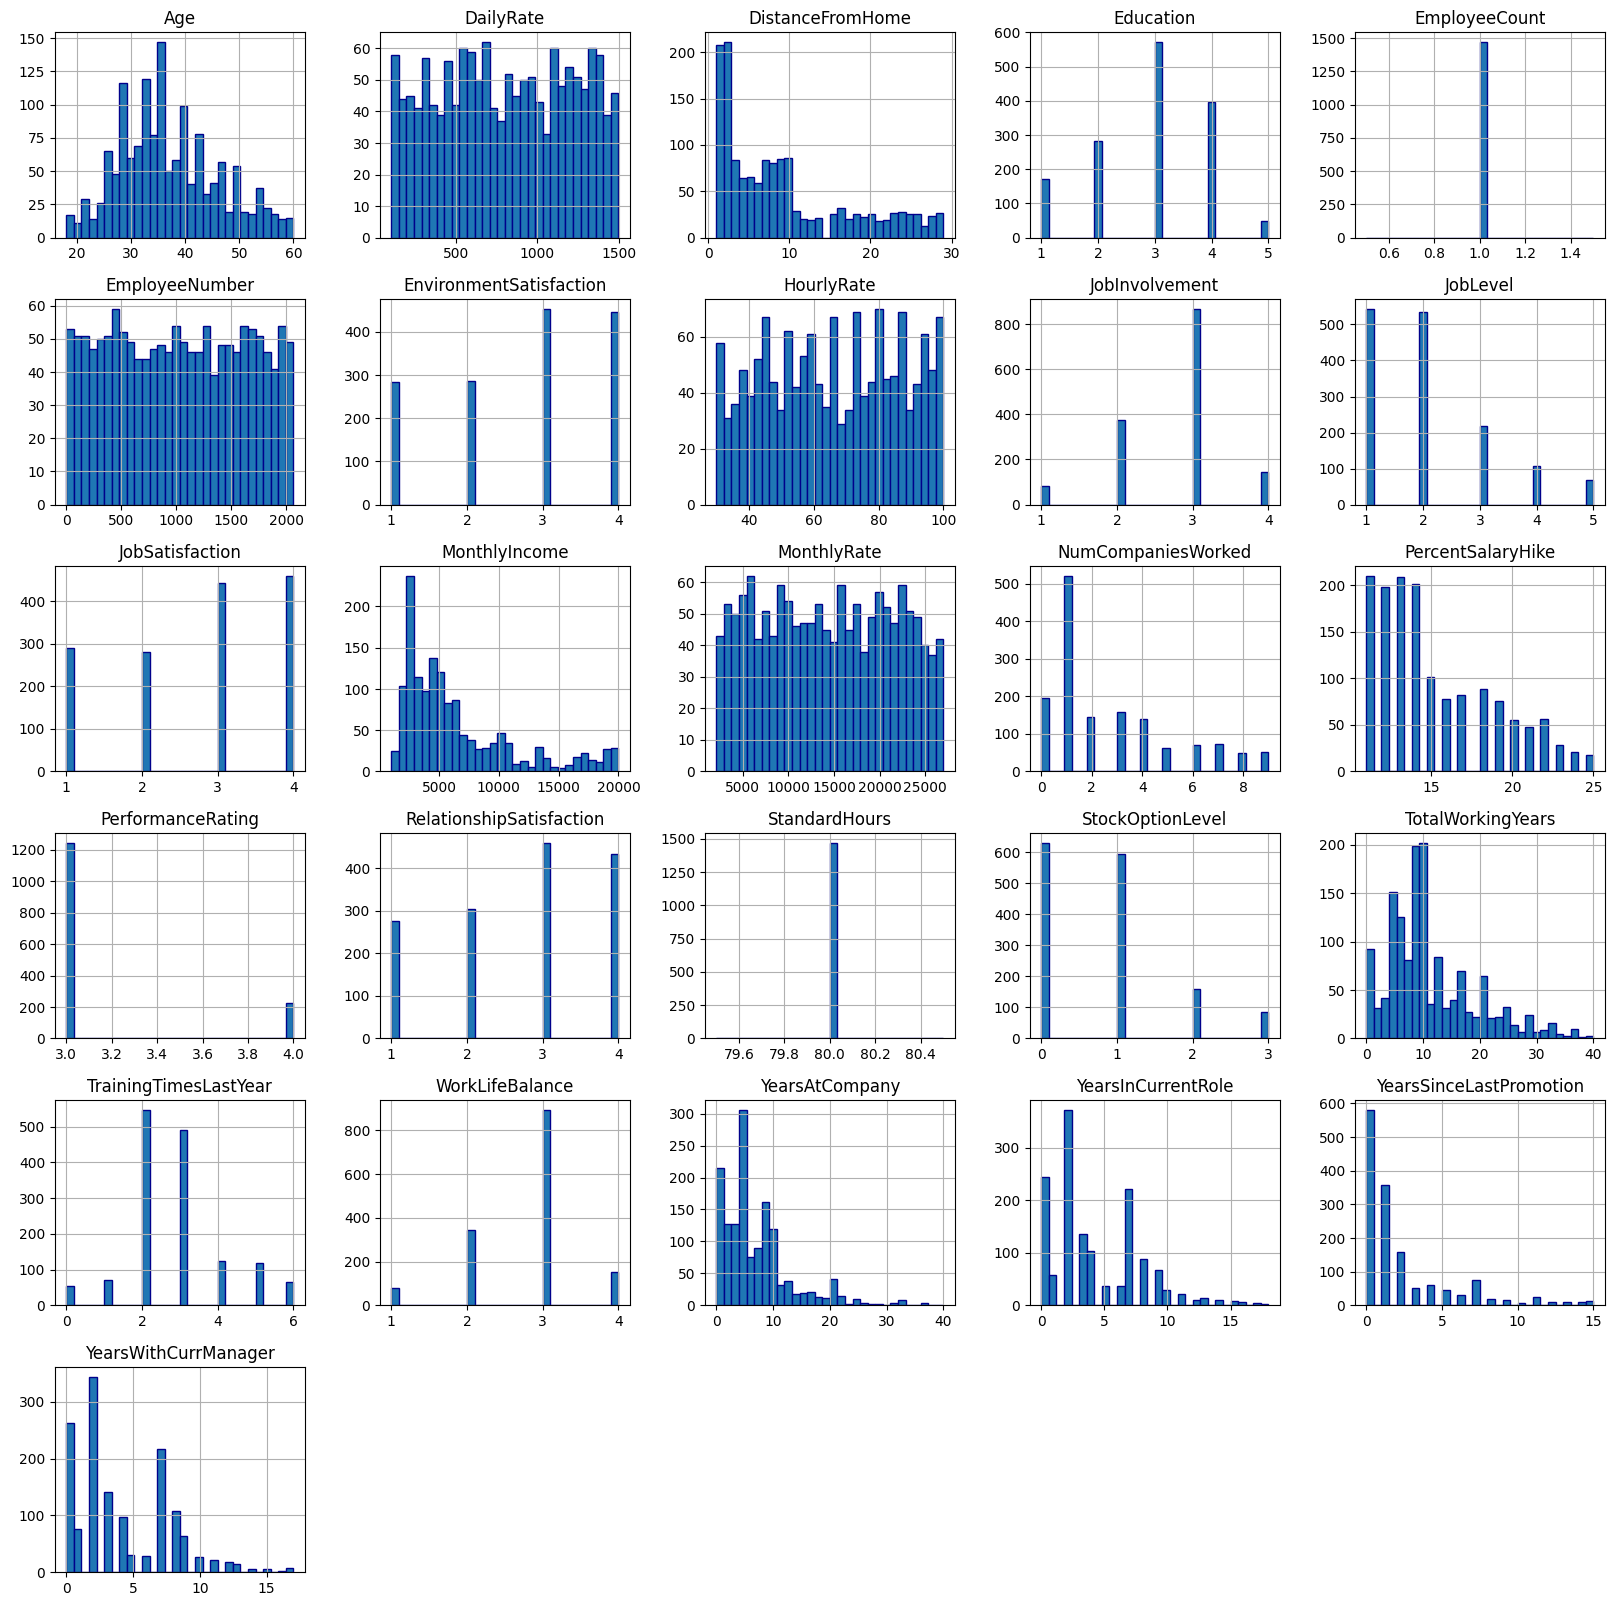

In [12]:
HRAnalytics.hist(bins = 30,figsize = (20,20),edgecolor = 'darkblue')

In [13]:
Avg_age_of_employees = HRAnalytics['Age'].mean()
print('Avg_age_of_employees:',Avg_age_of_employees)

Avg_age_of_employees: 36.923809523809524


In [14]:
Attrition_count = HRAnalytics['Attrition'].value_counts()
print('Attrition_count:\n',Attrition_count)

Attrition_count:
 No     1233
Yes     237
Name: Attrition, dtype: int64


In [15]:
fig = px.pie(HRAnalytics,names='Attrition',title='Attrition_count: \nYes:employee has left the company , \nNo:employee has not left the company')
fig.show()

#only 16.1% people left the company
#83.9% people are still with the company

In [16]:
Types_Of_Department_counts = HRAnalytics['BusinessTravel'].value_counts()
print('Number_of_people_by_BusinessTravel:\n',Types_Of_Department_counts)

Number_of_people_by_BusinessTravel:
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [17]:
Avg_Dailyrate_of_employees = HRAnalytics['DailyRate'].mean()
print('Avg_Dailyrate_of_employees:',Avg_Dailyrate_of_employees)

Avg_Dailyrate_of_employees: 802.4857142857143


In [18]:
Types_Of_Department_counts = HRAnalytics['Department'].value_counts()
print('Number_of_people_by_department:\n',Types_Of_Department_counts)

Number_of_people_by_department:
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [19]:
fig = px.pie(HRAnalytics,names='Department',title='Total Number of people by Department')
fig.show()

In [20]:
Types_Of_Education_counts = HRAnalytics['Education'].value_counts()
print('Number_of_people_by_education:\n',Types_Of_Education_counts)
#here education is in number format.
#1:High School
#2:College
#3:Bachelor's Degree
#4:Master's Degree or Higher

Number_of_people_by_education:
 3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


In [21]:
Types_Of_EducationField_counts = HRAnalytics['EducationField'].value_counts()
print('Number_of_people_By_EducationField:\n',Types_Of_EducationField_counts)

Number_of_people_By_EducationField:
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [22]:
fig = px.pie(HRAnalytics,names='EducationField',title='Total Number of people by EducationField')
fig.show()

In [23]:
Types_Of_EnvironmentSatisfaction_counts = HRAnalytics['EnvironmentSatisfaction'].value_counts()
print('Number of people_by_EnvironmentSatisfaction:\n',Types_Of_EnvironmentSatisfaction_counts)
#here EnvironmentSatisfaction is in number format
#1: Low satisfaction
#2: Medium-Low satisfaction
#3: Medium-High satisfaction
#4: High satisfaction

Number of people_by_EnvironmentSatisfaction:
 3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


In [24]:
Types_Of_Gender_counts = HRAnalytics['Gender'].value_counts()
print('Number of people by Gender:\n',Types_Of_Gender_counts)

Number of people by Gender:
 Male      882
Female    588
Name: Gender, dtype: int64


In [25]:
fig = px.pie(HRAnalytics,names='Gender',title='Total Number of people by Gender')
fig.show()

In [26]:
Avg_HourlyRate_of_employees = HRAnalytics['HourlyRate'].mean()
print('Avg_HourlyRate_of_employees:',Avg_HourlyRate_of_employees)

Avg_HourlyRate_of_employees: 65.89115646258503


In [27]:
Types_Of_JobInvolvement_counts = HRAnalytics['JobInvolvement'].value_counts()
print('Number_of_people_by_JobInvolvement:\n',Types_Of_JobInvolvement_counts)
#Here JobInvolvement is in number format
#1: Low job involvement
#2: Medium-Low job involvement
#3: Medium-High job involvement
#4: High job involvement

Number_of_people_by_JobInvolvement:
 3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


In [28]:
Types_Of_JobLevel_counts = HRAnalytics['JobLevel'].value_counts()
print('Number_of_people_by_JobLevel:\n',Types_Of_JobLevel_counts)
#Here JobLevel is in Number Format
#1: Entry-level or Junior
#2: Intermediate or Associate
#3: Mid-level or Senior
#4: Upper mid-level or Managerial
#5: Top-level or Executive

Number_of_people_by_JobLevel:
 1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


In [29]:
Types_Of_JobRole_counts = HRAnalytics['JobRole'].value_counts()
print('Number_of_people_by_JobRole:\n',Types_Of_JobRole_counts)

Number_of_people_by_JobRole:
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [30]:
fig = px.pie(HRAnalytics,names='JobRole',title='Total Number of people by JobRole')
fig.show()

In [31]:
Types_Of_JobSatisfaction_counts = HRAnalytics['JobSatisfaction'].value_counts()
print('Number_of_people_by_JobSatisfaction\n',Types_Of_JobSatisfaction_counts)

Number_of_people_by_JobSatisfaction
 4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


In [32]:
Types_Of_MaritalStatus_counts = HRAnalytics['MaritalStatus'].value_counts()
print('Number_of_people_by_MaritalStatus\n',Types_Of_MaritalStatus_counts)

Number_of_people_by_MaritalStatus
 Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [33]:
fig = px.pie(HRAnalytics,names='MaritalStatus',title='Total Number of people by Marital_Status')
fig.show()

In [34]:
Avg_Of_MonthlyIncome = HRAnalytics['MonthlyIncome'].mean()
print('Avg_monthly_income:',Avg_Of_MonthlyIncome)

Avg_monthly_income: 6502.931292517007


In [35]:
Avg_Of_MonthlyRate = HRAnalytics['MonthlyRate'].mean()
print('Avg_monthly_rate:',Avg_Of_MonthlyRate)

Avg_monthly_rate: 14313.103401360544


In [36]:
Types_Of_NumCompaniesWorked_counts = HRAnalytics['NumCompaniesWorked'].value_counts()
print('Number_of_people_by_Number_of_Companies_Worked\n',Types_Of_NumCompaniesWorked_counts)

Number_of_people_by_Number_of_Companies_Worked
 1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


In [37]:
Types_Of_Over18_counts = HRAnalytics['Over18'].value_counts()
print('Number_of_people_by_Over18_Age\n',Types_Of_Over18_counts)
#All people age is above 18 years only.

Number_of_people_by_Over18_Age
 Y    1470
Name: Over18, dtype: int64


In [38]:
Types_Of_OverTime_counts = HRAnalytics['OverTime'].value_counts()
print('Number_of_people_by_OverTime\n',Types_Of_OverTime_counts)

Number_of_people_by_OverTime
 No     1054
Yes     416
Name: OverTime, dtype: int64


In [39]:
Types_Of_PercentSalaryHike_counts = HRAnalytics['PercentSalaryHike'].value_counts()
print('Number_of_people_by_PercentSalaryHike\n',Types_Of_PercentSalaryHike_counts)

Number_of_people_by_PercentSalaryHike
 11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


In [40]:
Avg_Of_PercentSalaryHike = HRAnalytics['PercentSalaryHike'].mean()
print('Avg_of_PercentSalaryHike',Avg_Of_PercentSalaryHike)

Avg_of_PercentSalaryHike 15.209523809523809


In [41]:
Types_Of_PerformanceRating_counts = HRAnalytics['PerformanceRating'].value_counts()
print('Number_of_people_by_PerformanceRating\n',Types_Of_PerformanceRating_counts)
#PerformanceRating is in number format
#3: Satisfactory or meets expectations
#4: Exceeds expectations or high performance

Number_of_people_by_PerformanceRating
 3    1244
4     226
Name: PerformanceRating, dtype: int64


In [42]:
Types_Of_TotalWorkingYears_counts = HRAnalytics['TotalWorkingYears'].value_counts()
print('Number_of_people_by_TotalWorkingYears\n',Types_Of_TotalWorkingYears_counts)

Number_of_people_by_TotalWorkingYears
 10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


In [43]:
Avg_Of_TotalWorkingYears = HRAnalytics['TotalWorkingYears'].mean()
print('Avg_Of_TotalWorkingYears',Avg_Of_TotalWorkingYears)

Avg_Of_TotalWorkingYears 11.279591836734694


In [44]:
Types_Of_WorkLifeBalance_counts = HRAnalytics['WorkLifeBalance'].value_counts()
print('Number_of_people_by_WorkLifeBalance\n',Types_Of_WorkLifeBalance_counts)
#Here WorkLifeBalance is in number format.
#1: Poor work-life balance
#2: Fair work-life balance
#3: Good work-life balance
#4: Excellent work-life balance

Number_of_people_by_WorkLifeBalance
 3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


In [45]:
Types_Of_YearsAtCompany_counts = HRAnalytics['YearsAtCompany'].value_counts()
print('Number_of_people_by_YearsAtCompany\n',Types_Of_YearsAtCompany_counts)

Number_of_people_by_YearsAtCompany
 5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64
